In [66]:
# national parks!
# https://www.responsible-datasets-in-context.com/posts/np-data/?tab=explore-the-data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [13]:
data = pd.read_csv("US-National-Parks_Use_1979-2023_By-Month.csv")
data.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,TentCampers,RVCampers,Backcountry
0,Acadia NP,ACAD,National Park,Northeast,ME,1979,1,6011,15252,102,13,0
1,Acadia NP,ACAD,National Park,Northeast,ME,1979,2,5243,13776,53,8,0
2,Acadia NP,ACAD,National Park,Northeast,ME,1979,3,11165,15252,176,37,0
3,Acadia NP,ACAD,National Park,Northeast,ME,1979,4,219351,37657,1037,459,0
4,Acadia NP,ACAD,National Park,Northeast,ME,1979,5,339416,50616,3193,1148,0


In [14]:
# columns to remove: ParkType, NonRec, TentCampers, RVCampers, Backcountry
data = data.drop(['ParkType', 'NonRecreationVisits', 'TentCampers', 'RVCampers', 'Backcountry'], axis=1)
print(data.shape)
data.head()

(33395, 7)


,ParkName,UnitCode,Region,State,Year,Month,RecreationVisits
0,Acadia NP,ACAD,Northeast,ME,1979,1,6011
1,Acadia NP,ACAD,Northeast,ME,1979,2,5243
2,Acadia NP,ACAD,Northeast,ME,1979,3,11165
3,Acadia NP,ACAD,Northeast,ME,1979,4,219351
4,Acadia NP,ACAD,Northeast,ME,1979,5,339416


In [18]:
# how many parts are in each region?
print(data.groupby('Region')['ParkName'].nunique())

# what about each state?
# print(data.groupby('State')['ParkName'].nunique())

Region
Alaska             8
Intermountain     19
Midwest            9
Northeast          3
Pacific West      17
Southeast          7
Name: ParkName, dtype: int64


In [19]:
# check around for missing data # no missing data! 
print(data.isnull().sum())

ParkName            0
UnitCode            0
Region              0
State               0
Year                0
Month               0
RecreationVisits    0
dtype: int64


In [47]:
# create new column that is the year and month to plot
data['YearMonth'] = data['Year']*100 + data['Month']

# create a new column that is "weather" based on which month of the year it is
data['SeasonalTemp'] = np.where((data['Month'] >= 4) & (data['Month'] <= 10), 'Warm', 'Cool')

# create a new column that is year and the seasonalTemp
data['YearTemp'] = data['Year'].astype(str) + '_' + data['SeasonalTemp'].astype(str)

data.head()

,ParkName,UnitCode,Region,State,Year,Month,RecreationVisits,YearMonth,SeasonalTemp,YearTemp
0,Acadia NP,ACAD,Northeast,ME,1979,1,6011,197901,Cool,1979_Cool
1,Acadia NP,ACAD,Northeast,ME,1979,2,5243,197902,Cool,1979_Cool
2,Acadia NP,ACAD,Northeast,ME,1979,3,11165,197903,Cool,1979_Cool
3,Acadia NP,ACAD,Northeast,ME,1979,4,219351,197904,Warm,1979_Warm
4,Acadia NP,ACAD,Northeast,ME,1979,5,339416,197905,Warm,1979_Warm


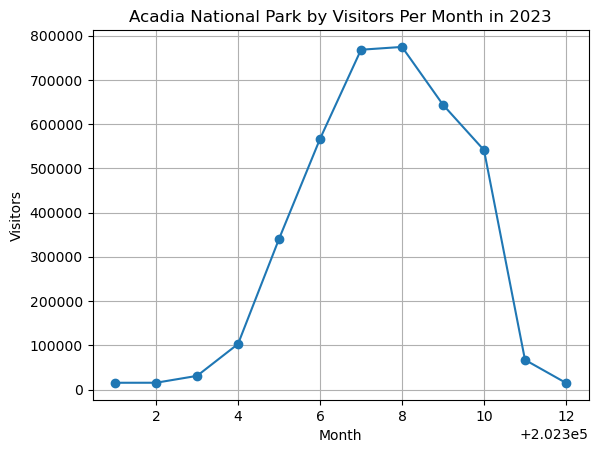

In [36]:
# plot a few parks!

acadia = data[(data['UnitCode'] == 'ACAD') & (data['Year'] == 2023)]
plt.plot(acadia['YearMonth'], acadia['RecreationVisits'], marker='o')  # 'o' adds markers to the plot
plt.title('Acadia National Park by Visitors Per Month in 2023')
plt.xlabel('Month')
plt.ylabel('Visitors')

# Show the plot
plt.grid(True)  # Optional: adds grid for better readability
plt.show()

In [53]:
seasonalVisits = data.groupby(['ParkName', 'YearTemp'])['RecreationVisits'].sum().reset_index()
seasonalVisits.head()

,ParkName,YearTemp,RecreationVisits
0,Acadia NP,1979_Cool,214011
1,Acadia NP,1979_Warm,2573355
2,Acadia NP,1980_Cool,245409
3,Acadia NP,1980_Warm,2534257
4,Acadia NP,1981_Cool,291058


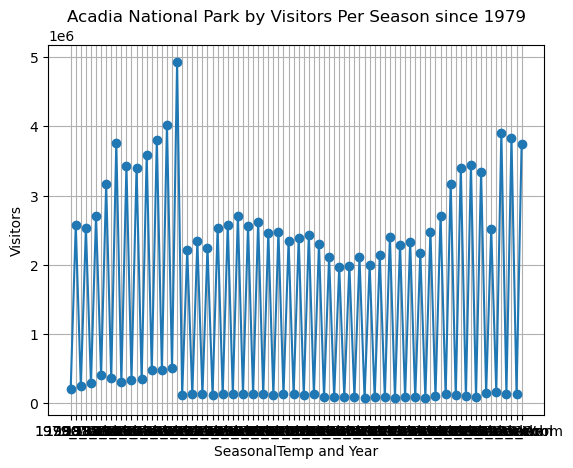

In [56]:
# plot a few parks!
acadia = seasonalVisits[(seasonalVisits['ParkName'] == 'Acadia NP')]
plt.plot(acadia['YearTemp'], acadia['RecreationVisits'], marker='o')  # 'o' adds markers to the plot
plt.title('Acadia National Park by Visitors Per Season since 1979')
plt.xlabel('SeasonalTemp and Year')
plt.ylabel('Visitors')

# Show the plot
plt.grid(True)  # Optional: adds grid for better readability
plt.show()

In [70]:
# data wrangle to make new data frame
# columns are national parks
# rows are yearMonth
# values are number of visits

visits_byPark = data.pivot(index='YearMonth', columns='ParkName', values='RecreationVisits')
visits_byPark.head()

ParkName,Acadia NP,Arches NP,Badlands NP,Big Bend NP,Biscayne NP,Black Canyon of the Gunnison NP,Bryce Canyon NP,Canyonlands NP,Capitol Reef NP,Carlsbad Caverns NP,...,Shenandoah NP,Theodore Roosevelt NP,Virgin Islands NP,Voyageurs NP,White Sands NP,Wind Cave NP,Wrangell-St. Elias NP & PRES,Yellowstone NP,Yosemite NP,Zion NP
YearMonth,,,,,,,,,,,,,,,,,,,,,
197901,6011.0,2970.0,16992.0,22294.0,10216.0,1920.0,3458.0,1225.0,1620.0,20171.0,...,24503.0,7026.0,54773.0,8476.0,14973.0,7588.0,NaN,23605.0,72701.0,8994.0
197902,5243.0,3135.0,15887.0,16796.0,13979.0,2846.0,4535.0,726.0,2471.0,26003.0,...,20437.0,8307.0,53364.0,10754.0,31467.0,8434.0,NaN,31992.0,72926.0,12106.0
197903,11165.0,14659.0,19375.0,45669.0,17010.0,4980.0,9227.0,7087.0,9661.0,48848.0,...,67572.0,14431.0,53784.0,2812.0,96099.0,11871.0,NaN,17813.0,87950.0,23079.0
197904,219351.0,31818.0,26056.0,44866.0,19773.0,6476.0,24124.0,10097.0,39171.0,60622.0,...,132350.0,19693.0,48277.0,741.0,87325.0,14195.0,NaN,34095.0,136275.0,63306.0
197905,339416.0,39266.0,54710.0,18691.0,23505.0,23145.0,61698.0,15216.0,46359.0,70635.0,...,147045.0,42398.0,43627.0,29030.0,51900.0,40960.0,NaN,108952.0,210756.0,122964.0


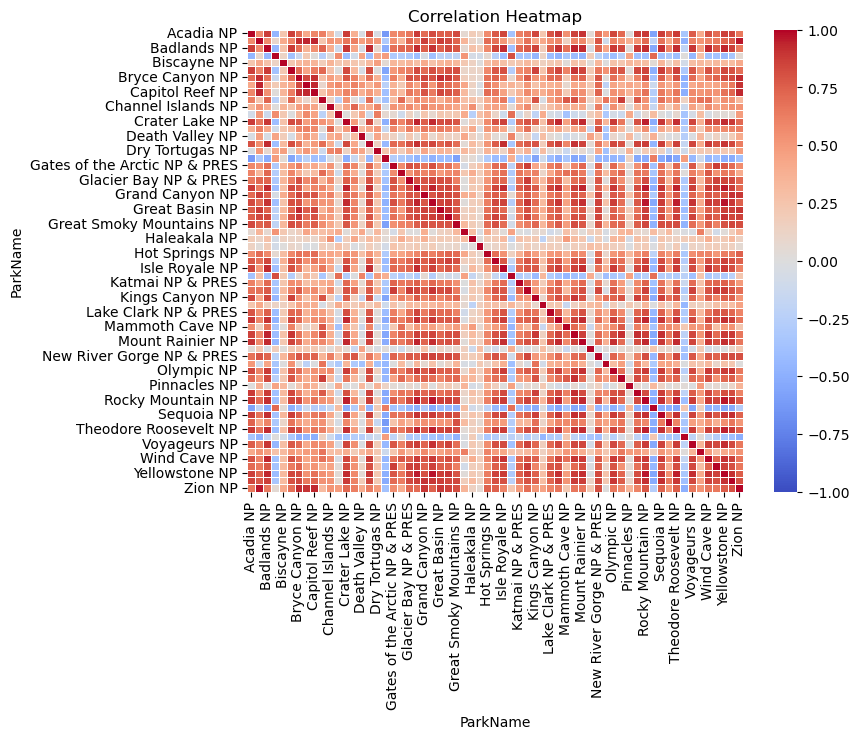

In [69]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(visits_byPark.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [78]:
# setting up the machine learning framework!
data.head()

,ParkName,UnitCode,Region,State,Year,Month,RecreationVisits,YearMonth,SeasonalTemp,YearTemp
0,Acadia NP,ACAD,Northeast,ME,1979,1,6011,197901,Cool,1979_Cool
1,Acadia NP,ACAD,Northeast,ME,1979,2,5243,197902,Cool,1979_Cool
2,Acadia NP,ACAD,Northeast,ME,1979,3,11165,197903,Cool,1979_Cool
3,Acadia NP,ACAD,Northeast,ME,1979,4,219351,197904,Warm,1979_Warm
4,Acadia NP,ACAD,Northeast,ME,1979,5,339416,197905,Warm,1979_Warm


In [ ]:
X = data.drop(columns=['RecreationVisits'])
y = data['RecreationVisits']